<a href="https://colab.research.google.com/github/goyaljai1/Machine_Learning/blob/main/Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#importing dataset from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [41]:
!kaggle datasets download -d animatronbot/mnist-digit-recognizer

mnist-digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [42]:
!unzip '/content/mnist-digit-recognizer.zip'

Archive:  /content/mnist-digit-recognizer.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
#importing libraries
import pandas as pd
import numpy as np

In [3]:
#reading csv file
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here number of columns are 785 i.e. very large so we need to perform dimensionality reduction

In [4]:
#defining X and y
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [5]:
#performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [7]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [8]:
#chcecking number of column after applying PCA
X_train_trf.shape

(33600, 200)

In [9]:
#importing knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [10]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test_trf)

In [12]:
#calculating accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9676190476190476

In [13]:
#getting eigen values
pca.explained_variance_

array([335506.57620544, 244807.10511442, 212051.0345165 , 185066.15331643,
       168000.24596853, 148918.34905623, 112510.83340209,  99329.48444433,
        95140.26441454,  79978.97709016,  71872.98931731,  70295.41855281,
        58642.17064567,  57797.84788158,  54416.08107528,  51094.27632925,
        45432.48090442,  44087.7557423 ,  40634.96784429,  39529.38503822,
        36946.57183798,  35169.451414  ,  33191.94921844,  31498.07839924,
        30379.28062781,  28621.64409405,  27987.85491942,  26623.31466668,
        25478.29769701,  23807.36816764,  22692.17429755,  21743.11666431,
        20713.09877463,  20215.78534798,  19292.0931935 ,  18537.71836942,
        17440.58129119,  16726.94208679,  16181.85994325,  15951.91565973,
        15537.57647062,  15248.06049227,  14302.3838212 ,  13585.34380635,
        13172.16484572,  12812.43656063,  12385.86119805,  11979.3099193 ,
        11475.73209558,  10919.83699208,  10789.15231747,  10549.79757768,
        10039.28673085,  

In [14]:
#eigen vectors
pca.components_

array([[-2.12173392e-18,  3.23425003e-19,  9.77433004e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.02960378e-17, -8.92769642e-18,  2.16137761e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.20908269e-17, -1.37320266e-17,  2.03978538e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 6.71897902e-17, -2.27061771e-17, -3.54982197e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.41800992e-17, -5.76064609e-17, -8.75242315e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.58516005e-17,  1.06916058e-16, -1.06196878e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

#Finding optimum numbers of PCA components

In [15]:
#performing pca for complete number of rows
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

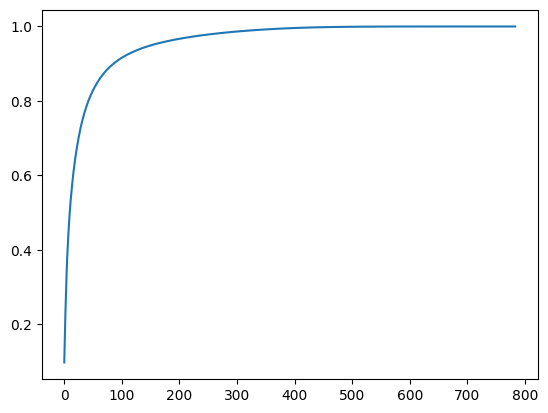

In [16]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))

**Generally we take the components which explains 90% of the variance**